# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\YashnaBehera\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\YashnaBehera\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\YashnaBehera\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\YashnaBehera\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data_train=pd.read_csv("C:\\Users\\YashnaBehera\\Desktop\\pandas\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\advertising.csv")

In [4]:
data_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data_train.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis

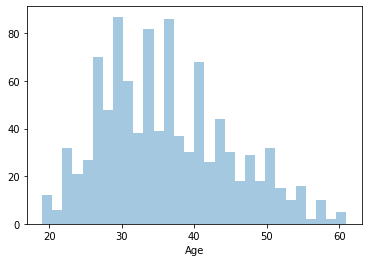

In [9]:
sns.distplot(data_train["Age"],bins=30,kde=False)

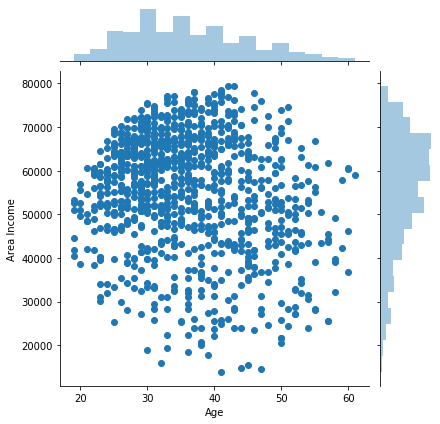

In [10]:
sns.jointplot(x="Age",
    y="Area Income",
    data=data_train,
    kind='scatter')

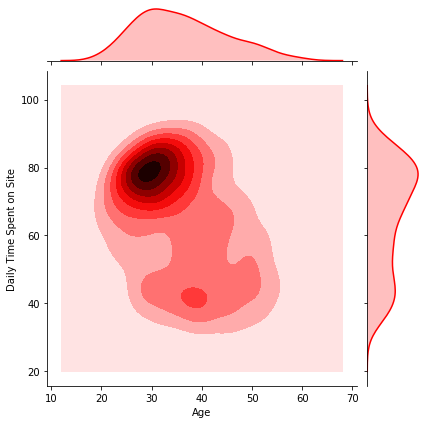

In [15]:
sns.jointplot(x="Age",y="Daily Time Spent on Site",data=data_train, kind='kde',color="red")

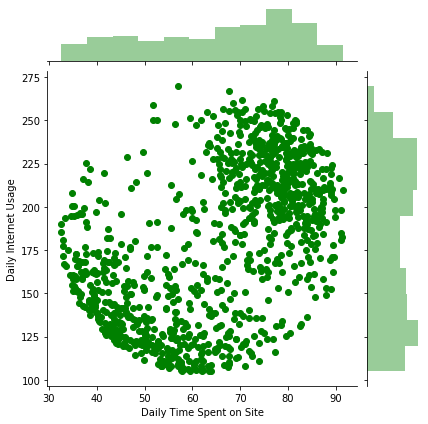

In [16]:
sns.jointplot(y="Daily Internet Usage",x="Daily Time Spent on Site",data=data_train, kind='scatter',color="green")

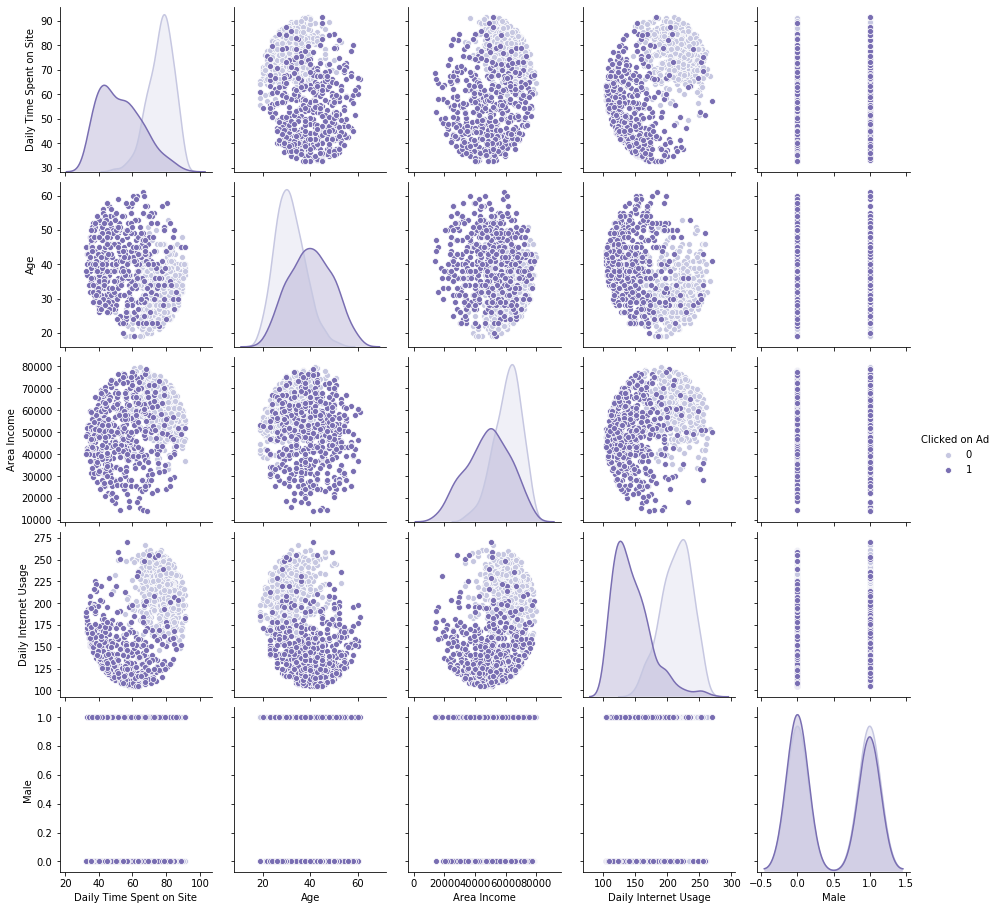

In [24]:
sns.pairplot(data=data_train,
    hue="Clicked on Ad",palette="Purples")

# Logistic Regression

** Split the data into training set and testing set using train_test_split**

In [31]:
x=data_train[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y=data_train["Clicked on Ad"]

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logr=LogisticRegression()

In [38]:
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions and Evaluations

In [39]:
y_pred=logr.predict(x_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [45]:
print (classification_report(y_test,y_pred))
print ("")
print (confusion_matrix(y_test,y_pred))
print ("")
print (accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300


[[149   8]
 [ 14 129]]

0.9266666666666666


In [46]:
ypred=logr.predict(x)

In [48]:
print (ypred)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0
 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 0 

In [49]:
print (y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64
